<a href="https://colab.research.google.com/github/JRose31/Linear-Regression_Home_Prices/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Home Prices with Linear Regression
##### Jamaine D Roseborough Jr.


## Defining Our Problem

We're presented with data pertaining to home sales in a csv file. We seek to build a Linear Reagression model that can predict the price of a home, given certain predictors.

### Process
---
1. Loading Data into our script
2. Cleaning the data
3. Analyzing Data
4. Processing the Data (Encoding & Imputations)
5. Create & Fit Model
6. Analyze Results
7. Manipulate Dataset
8. Re-fit Model
9. Test other Models
10. Compare Results


## Collect / Load the Data

Our data is available  in the form of a CSV file located in our drive. We'll mount our drive and load our data into our script.

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Read in data
import pandas as pd

data = pd.read_csv('/drive/My Drive/Cohort_7/Projects/Project 2/Data/Housing Data.csv')

We'll take a peek at the data to get a quick idea of what we're working with.

In [ ]:
# Quick snapshot of dataset
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,3,1964,1964,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,513.0,LwQ,144.0,348.0,1005.0,GasA,...,Y,SBrkr,1005,0,0,1005,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1964.0,Unf,2.0,440.0,TA,TA,N,0,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2.0,516.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,...,Y,SBrkr,780,595,0,1375,0.0,0.0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1979.0,Unf,1.0,544.0,TA,TA,P,0,162,0,0,126,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,484.0,Unf,0.0,491.0,975.0,GasA,...,Y,SBrkr,975,873,0,1848,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2000.0,RFn,2.0,592.0,TA,TA,Y,280,184,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,7,9,1936,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,Gd,Gd,No,ALQ,350.0,BLQ,210.0,0.0,560.0,GasA,...,Y,SBrkr,575,560,0,1135,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1971.0,RFn,2.0,576.0,TA,TA,Y,256,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


So it seems like we have a mix of continuous, discrete, nominal, and ordinal data. We'll have to do some data processing later.

## Data Cleaning / Exploratory Data Analysis

Now we'll take a deeper look and see where our data needs cleaning. Running `.info()` give us the capability to see each column, how many `non-null` values it has, the data type, and we're given the shape of our data.

In [ ]:
# Get data size, predictor types, and Null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

Now we now our dataset's dimensions: `(2637, 81)`



We also notice that the `non-null` count for certain predictors are extremely low. These predictors won't bring any value to our model (it might even hurt it), so we'll drop those predictors from the start.

#### Drop Null-Dominant Predictors

---



First we'll make a list that contains all the column names that have more than `450` null values.

In [ ]:
# Drop columns with too many null values
drops = []

for column in data.columns:
  # If count of null values is larger than 147, add to list of columns to drop
  if data[column].isna().sum()  > 450:
    drops.append(column)

drops

['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']

Now, we'll drop those columns, **but** we'll do this on a copy of our original dataset. We still want to keep the original dataset in tact in case we need to reference it later.

In [ ]:
# Make copy of DataFrame before we actually drop
data_copy = data.copy()

# Drop specified columns
data_copy.drop(columns=drops, inplace=True, axis = 1)

data_copy

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,3,1964,1964,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,513.0,LwQ,144.0,348.0,1005.0,GasA,TA,Y,SBrkr,1005,0,0,1005,1.0,0.0,1,0,3,1,TA,5,Typ,0,Detchd,1964.0,Unf,2.0,440.0,TA,TA,N,0,0,0,0,0,0,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2.0,516.0,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,TA,Y,SBrkr,780,595,0,1375,0.0,0.0,1,1,3,1,Gd,6,Typ,1,Detchd,1979.0,Unf,1.0,544.0,TA,TA,P,0,162,0,0,126,0,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,484.0,Unf,0.0,491.0,975.0,GasA,Ex,Y,SBrkr,975,873,0,1848,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2000.0,RFn,2.0,592.0,TA,TA,Y,280,184,0,0,0,0,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,7,9,1936,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,Gd,Gd,No,ALQ,350.0,BLQ,210.0,0.0,560.0,GasA,Ex,Y,SBrkr,575,560,0,1135,1.0,0.0,1,0,3,1,Gd,6,Typ,0,Detchd,1971.0,RFn,2.0,576.0,TA,TA,Y,256,0,0,0,0,0,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,816.0,816.0,GasA,TA,Y,SBrkr,816,0,360,1176,0.0,0.0,1,0,3,1,TA,6,Typ,1,Detchd,1985.0,Unf,2.0,528.0,TA,TA,Y,112,0,0,0,0,0,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,SLvl,7,6,1990,1991,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,460.0,ALQ,286.0,308.0,1054.0,GasA,Gd,Y,SBrkr,1061,0,0,1061,1.0,0.0,1,1,1,1,Gd,4,Typ,0,Attchd,1990.0,Unf,2.0,462.0,TA,TA,Y,114,36,0,0,0,0,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Greens,Norm,Norm,TwnhsE,1Story,8,5,1981,1981,Gable,CompShg,Wd Sdng,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,960.0,Unf,0.0,266.0,1226.0,GasA,TA,Y,SBrkr,1226,0,0,1226,1.0,0.0,1,0,1,1,Gd,4,Typ,2,Attchd,1981.0,Fin,2.0,484.0,TA,TA,Y,133,78,0,0,0,0,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1974,1974,Hip,CompShg,HdBoard,HdBoard,BrkFace,174.0,TA,TA,CBloc

Now that our columns filled with predominantly null values are dropped, we can start assessing that the assumptions made by Linear Regression about our dataset are true. These assumptions are:
* No Collinearity between predictors
* Linear relationship to response
* Residuals are independent
* Residuals are normally distributed
* Constant variance of residuals


First we'll start by checking the assumption that our predictors aren't coorelated.

### Correlation Heatmap

We'll import our plotting libraries and generate a coorelation heatmap of our predictors.

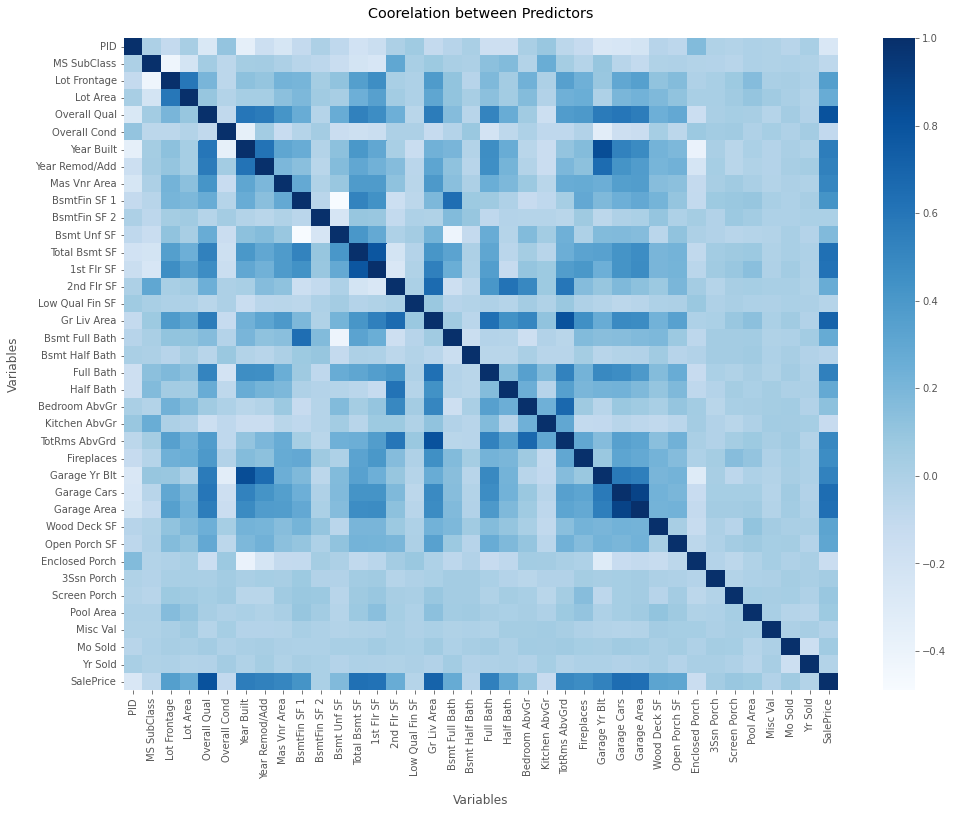

In [ ]:
# Look at coorelations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plt.style.use('ggplot')

# Colors used in visualizations
orange = '#fcc10e'
blue = '#59a0d7'


# Map out correlations between predictors
cols_corr = data_copy.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(cols_corr, cmap="Blues")
plt.title('Coorelation between Predictors', pad= 20)
plt.xlabel('Variables', labelpad= 15)
plt.ylabel('Variables', labelpad= 15);



We have a couple of predictors that are closely coorelated. We'll assess these predictors relationship to our response variable `SalePrice` to ensure we're keeping the predictor that has a more linear relationship to our response (*another assumption of Linear Regression*).

### Assessing Predictor Relationships

Two predictors that seem to be highly coorelated are `Garage Yr Blt` and `Year Built` as one would expect. Lets see that visually.

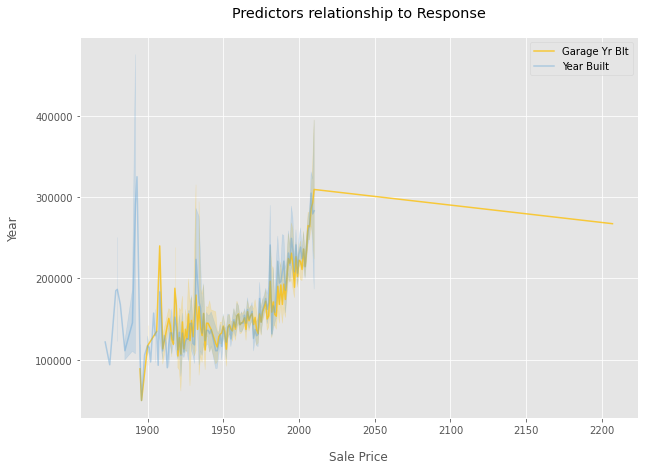

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Garage Yr Blt', y='SalePrice', data=data_copy, label = "Garage Yr Blt", alpha=0.8, color = orange)
sns.lineplot(x='Year Built', y='SalePrice', data=data_copy, label = "Year Built", alpha=0.4, color = blue)
plt.title('Predictors relationship to Response', pad=20)
plt.xlabel('Sale Price', labelpad=15)
plt.ylabel('Year', labelpad=15)
plt.legend()
plt.show();

As we expected, these 2 predictors are similar in their observation measurements. Notice how Garage Year Built variable has an outlier. Normally we wouldn't base dropping a predictor on a single outlier, but since we know that these observations measure almost the same value, we can confidently do so.

Next, we'll look at `Year Built` and `Overall Qual`. We would expect these to be heavily coorelated as well, but lets assess their relationship to `SalePrice`.

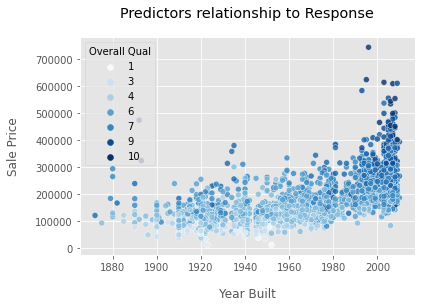

In [ ]:
# Plot Overall Quality against Sale Price, colord by Year Built 
sns.scatterplot(x="Year Built", y="SalePrice", data=data_copy, hue="Overall Qual", palette=sns.color_palette("Blues", as_cmap=True, n_colors=10), alpha = 0.8)
plt.title('Predictors relationship to Response', pad=20)
plt.xlabel('Year Built', labelpad=15)
plt.ylabel('Sale Price', labelpad=15)
plt.show();

Whilst being somewhat coorelated, their linear relationship to `SalePrice` is stronger, so we'll keep both of these predictors to train our model.

Next we'll look at `1st Flr SF` and `Total Bsmt SF`. One would assume that the 1st floor of a home would be generally a simialr size to the basement that it sits above. We would expect these predictors to share a similar case with our earlier predictors where they're highly coorelated and share the similar measurement values per observation.

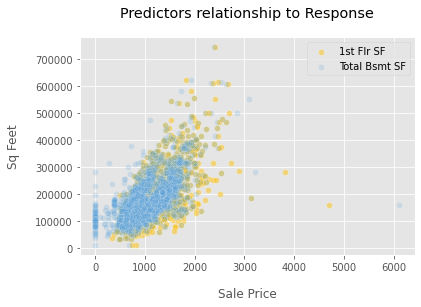

In [ ]:
# Plot Total Bsmt SF and 1st Flr SF against Sale Price

sns.scatterplot(x='1st Flr SF', y='SalePrice', data=data_copy, label = "1st Flr SF", alpha=0.5, color = orange)
sns.scatterplot(x='Total Bsmt SF', y='SalePrice', data=data_copy, label = "Total Bsmt SF", alpha=0.2, color = blue)
plt.title('Predictors relationship to Response', pad=20)
plt.xlabel('Sale Price', labelpad=15)
plt.ylabel('Sq Feet', labelpad=15)
plt.legend()
plt.show();

As we assumed, the 1st floor square footage is highly coorelated to the total Basement square footage, and they share similar measurements. If we're going to pick a predictor to drop, `Total Bsmt SF` would be a good choice because it seems that it has a couple of missing datapoints.

 Lets explore more of these relationships between predictors and see if we can slim down our input variables.

Lastly, before we move on to processing our data to then fit and train our model <sup>(exciting!)</sup>, we'll look at `BsmtFin SF 1` and `Bsmt Full Bath`. From our data description file that came with our, we know that `BsmtFin SF 1` is a discrete measurement while `Bsmt Full Bath` is continuous. So we know we have to assess their linear relationships independently.

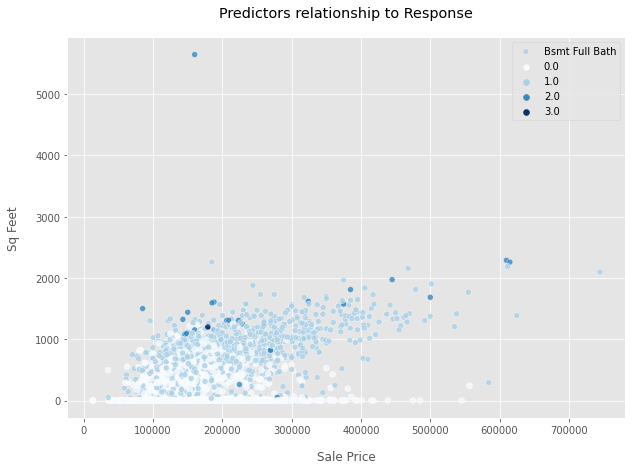

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='SalePrice', y='BsmtFin SF 1', data=data_copy, 
                label = "Bsmt Full Bath", alpha=0.8, hue='Bsmt Full Bath', palette=sns.color_palette("Blues", as_cmap=True, n_colors=4))
plt.title('Predictors relationship to Response', pad=20)
plt.xlabel('Sale Price', labelpad=15)
plt.ylabel('Sq Feet', labelpad=15)
plt.legend()
plt.show();

Initially we notice that `BsmtFin SF 1` has a pretty strong linear relationship to `SalePrice`. We also notice that `Bsmt Full Bath` doesn't. Let's take a look at this in a lineplot.

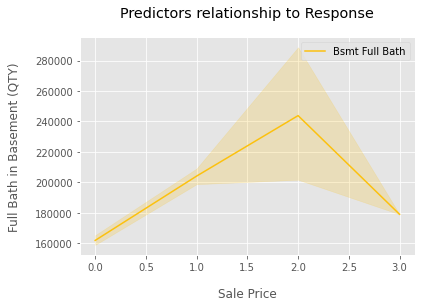

In [ ]:
sns.lineplot(x = 'Bsmt Full Bath', y = 'SalePrice', label= 'Bsmt Full Bath', data = data_copy, color = orange)
plt.title('Predictors relationship to Response', pad=20)
plt.xlabel('Sale Price', labelpad=15)
plt.ylabel('Full Bath in Basement (QTY)', labelpad=15)
plt.legend()
plt.show();

Our data is more in the shape of a parabola than a straight line. We'll go ahead and add this predictor to the chopping block.

Now we're ready to make the changes to our DataFrame and move on to the next steps.

### Drop Candidates

From our EDA, we can drop the following variables:
* Garage Yr Blt
* Total Bsmt SF
* Bsmt Full Bath

In [ ]:
# Drop these columns from our DataFrame
drops = ['Garage Yr Blt', 'Total Bsmt SF', 'Bsmt Full Bath']
data_copy.drop(columns=drops, inplace=True, axis = 1)

#Ensure those columns have been dropped
data_copy.shape

(2637, 73)

Deeper manipulating the data, at this point we want to process the data and get it ready to fit in our model. For this we'll have to deal with the rest of our null values as well as convert our categorical variables into numerical values.

## Data Processing

First we'll break our data up by data types. This allows us to encode our categorical variables, impute our continuous variables, and join them when wer're done.

Lets make our categorical DataFrame first.

In [ ]:
# Pull out object data types
all_cat_data = data_copy.select_dtypes(include = 'object')
all_cat_data.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Normal
2,RM,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,Gd,PConc,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,P,WD,Normal
3,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,Gd,Gd,No,ALQ,BLQ,GasA,Ex,Y,SBrkr,Gd,Typ,Detchd,RFn,TA,TA,Y,WD,Normal


*After running my model with most categorical predictors included, I found utilizing only the predictors in the variable `cat_data` yeilds a lower RMSPE*

In [ ]:
# Using only these categorical predictors to train our model
cat_data = all_cat_data[['Bldg Type', 'House Style', 'Roof Style', 'Exter Qual']].copy()
cat_data

,Bldg Type,House Style,Roof Style,Exter Qual
0,1Fam,1Story,Gable,TA
1,Duplex,1Story,Gable,TA
2,1Fam,1.5Fin,Gable,TA
3,1Fam,2Story,Gable,Gd
4,1Fam,2Story,Gable,Gd
...,...,...,...,...
2632,1Fam,1.5Fin,Gable,TA
2633,1Fam,SLvl,Gable,Gd
2634,TwnhsE,1Story,Gable,Gd
2635,1Fam,1Story,Hip,TA


Now we'll create our DataFrame of continuous variables.

In [ ]:
# Pull out integer and float data types
num_data = data_copy.select_dtypes(include = ['int64', 'float64'])
num_data

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070,20,62.0,14299,4,3,1964,1964,0.0,513.0,144.0,348.0,1005,0,0,1005,0.0,1,0,3,1,5,0,2.0,440.0,0,0,0,0,0,0,0,7,2007,115400
1,905101330,90,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,0.0,1296,0,0,1296,0.0,2,0,2,2,6,0,2.0,516.0,0,0,0,0,0,0,500,10,2006,90000
2,903454090,50,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,780.0,780,595,0,1375,0.0,1,1,3,1,6,1,1.0,544.0,0,162,0,0,126,0,0,12,2007,141000
3,533244030,60,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,491.0,975,873,0,1848,0.0,2,1,3,1,7,1,2.0,592.0,280,184,0,0,0,0,0,4,2010,254000
4,909252020,70,60.0,7200,7,9,1936,2007,0.0,350.0,210.0,0.0,575,560,0,1135,0.0,1,0,3,1,6,0,2.0,576.0,256,0,0,0,0,0,0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,52.0,6240,6,6,1934,1950,0.0,0.0,0.0,816.0,816,0,360,1176,0.0,1,0,3,1,6,1,2.0,528.0,112,0,0,0,0,0,400,9,2006,114500
2633,906201021,80,74.0,10778,7,6,1990,1991,0.0,460.0,286.0,308.0,1061,0,0,1061,0.0,1,1,1,1,4,0,2.0,462.0,114,36,0,0,0,0,0,7,2009,162000
2634,533253070,120,61.0,3782,8,5,1981,1981,0.0,960.0,0.0,266.0,1226,0,0,1226,0.0,1,0,1,1,4,2,2.0,484.0,133,78,0,0,0,0,0,9,2009,211500
2635,527376100,20,78.0,10140,6,5,1974,1974,174.0,0.0,0.0,1064.0,1350,0,0,1350,0.0,2,0,3,1,7,1,2.0,478.0,0,0,0,0,0,0,0,8,2009,165000


### Encode Categorical Varibales

Now that we have our seperate DataFrames, we'll move on to encoding. First, our categorical predictors.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Fill Null values with mode of set
for var in cat_data.columns:
  cat_data[var].fillna(cat_data[var].mode(dropna = True)[0], inplace = True)

# Integer Encode here
labelencoder = LabelEncoder()
cat_data['Exter Qual Label'] = labelencoder.fit_transform(cat_data['Exter Qual'])

# One-Hot Encode here
nominal = ['Bldg Type', 'House Style', 'Roof Style']

for col in nominal:
  cat_encoded = pd.get_dummies(cat_data, columns=nominal)

cat_encoded

,Exter Qual,Exter Qual Label,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
0,TA,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,TA,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,TA,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Gd,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Gd,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,TA,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2633,Gd,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2634,Gd,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2635,TA,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Impute Continuous Variables

And we'll impute our continuous variables. *Typically we would want to assess our predictors for outliers before we decide on our imputation method, but here we arbitrarily impute using the mean of the set. This may be something that affect our models performance negatively so we may come back and change our imputation method.*

In [ ]:
# Simple Imputer
from sklearn.impute import SimpleImputer
import numpy as np

# Set instance of Simple Imputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Impute data
data_imputed = imp.fit_transform(num_data)

# Create DataFrame from object
num_data_imputed = pd.DataFrame(data_imputed, columns=num_data.columns)

num_data_imputed.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070.0,20.0,62.0,14299.0,4.0,3.0,1964.0,1964.0,0.0,513.0,144.0,348.0,1005.0,0.0,0.0,1005.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,2.0,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,115400.0
1,905101330.0,90.0,72.0,10791.0,4.0,5.0,1967.0,1967.0,0.0,0.0,0.0,0.0,1296.0,0.0,0.0,1296.0,0.0,2.0,0.0,2.0,2.0,6.0,0.0,2.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,10.0,2006.0,90000.0
2,903454090.0,50.0,50.0,9000.0,6.0,6.0,1937.0,1950.0,0.0,0.0,0.0,780.0,780.0,595.0,0.0,1375.0,0.0,1.0,1.0,3.0,1.0,6.0,1.0,1.0,544.0,0.0,162.0,0.0,0.0,126.0,0.0,0.0,12.0,2007.0,141000.0
3,533244030.0,60.0,68.0,7379.0,8.0,5.0,2000.0,2000.0,0.0,484.0,0.0,491.0,975.0,873.0,0.0,1848.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,592.0,280.0,184.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,254000.0
4,909252020.0,70.0,60.0,7200.0,7.0,9.0,1936.0,2007.0,0.0,350.0,210.0,0.0,575.0,560.0,0.0,1135.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,2.0,576.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0,155000.0


Both our DataFrames are now all numerical and have zero missing observations. We'll join them along columns to have our working DataFrame.

In [ ]:
'''Combine encoded dataframe to data frame with just numeric values & 
drop 'Exter Qual' since its the object type version (prior to encoding)'''
data_comb = pd.concat([num_data_imputed, 
                       cat_encoded.drop(columns='Exter Qual')], axis = 1)

data_comb.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Exter Qual Label,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
0,905101070.0,20.0,62.0,14299.0,4.0,3.0,1964.0,1964.0,0.0,513.0,144.0,348.0,1005.0,0.0,0.0,1005.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,2.0,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,115400.0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,905101330.0,90.0,72.0,10791.0,4.0,5.0,1967.0,1967.0,0.0,0.0,0.0,0.0,1296.0,0.0,0.0,1296.0,0.0,2.0,0.0,2.0,2.0,6.0,0.0,2.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,10.0,2006.0,90000.0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,903454090.0,50.0,50.0,9000.0,6.0,6.0,1937.0,1950.0,0.0,0.0,0.0,780.0,780.0,595.0,0.0,1375.0,0.0,1.0,1.0,3.0,1.0,6.0,1.0,1.0,544.0,0.0,162.0,0.0,0.0,126.0,0.0,0.0,12.0,2007.0,141000.0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,533244030.0,60.0,68.0,7379.0,8.0,5.0,2000.0,2000.0,0.0,484.0,0.0,491.0,975.0,873.0,0.0,1848.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,592.0,280.0,184.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,254000.0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,909252020.0,70.0,60.0,7200.0,7.0,9.0,1936.0,2007.0,0.0,350.0,210.0,0.0,575.0,560.0,0.0,1135.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,2.0,576.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0,155000.0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


We've captured our processed data into one DataFrame. Next step, building our model!

## Linear Regression

First things first, we'll make our imports and assign our `X` and `y` variables, those being our predictors and response respoectively.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Assign predictors and target variable
X = data_comb.drop('SalePrice', axis = 1)
y = data_comb['SalePrice']

Here we'll perform cross validation where we'll split up our data into training and testing subsets, train our model, and predict our `y_test` targets. Doing this in a loop `n` times cross validates our model.

We'll then get our Root Mean Squared Error (RMSE, *measured in actual units*), and Root Mean Squared Percentage Error (RMSPE, *measured in percentage relation to predicted value*)

In [ ]:
# Perform CV
n = 500
results = np.zeros(n)
percent = np.zeros(n)

# Initialize intance of model
model = LinearRegression()

for idx in range(n):
  #Split data into training and testing subsets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

  #Make, fit, and predict
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  #Add RMSE to results
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

  #Add percent error to percent
  #percent_error = sum(((abs(y_pred - y_test) / y_test) * 100)**2)
  percent[idx]= (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100

print(f"CV RMSE: {results.mean().round(2)}")
print(f"RMPE: {percent.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSE: 31497.15
RMPE: 20.24
Number of Predictors: 54


## Assess results

We'll also want to plot a `qqplot` to assess the distribution of our residuals. One of the assumptions of Linear Regression are that residuals are normally distributed.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



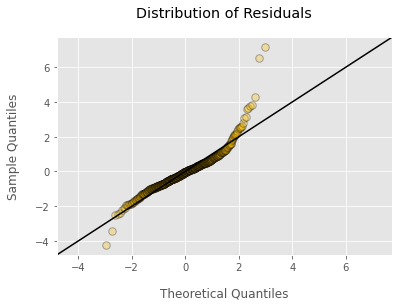

In [ ]:
import statsmodels.api as sm

# Residuals are the difference between true and predicted values
res = y_test - y_pred
pp = sm.ProbPlot(res, fit=True)
qq = pp.qqplot(marker='.', markerfacecolor=orange, markeredgecolor='k', markersize = 15, alpha=0.3)
sm.qqline(qq.axes[0], line='45', fmt='k-')

plt.title('Distribution of Residuals', pad=20)
plt.xlabel('Theoretical Quantiles', labelpad=15)
plt.ylabel('Sample Quantiles', labelpad=15)
plt.show()

The majority of our points fall on or along our line, our residuals follow a decently normal distribution.

We can also see this using an alternative visualization that also gives us our R<sup>2</sup> measurment which is a measures how well our line fits our points (*smaller residuals results in an R<sup>2</sup> closer to 1.*)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



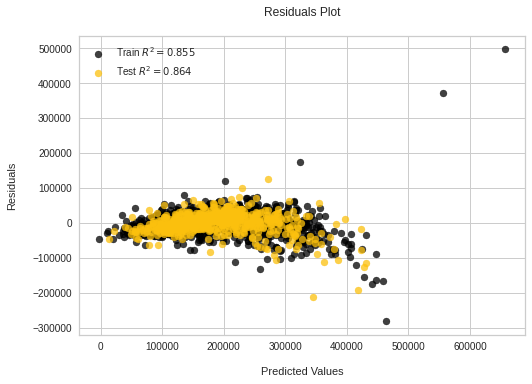

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Initialize instance of ResidualsPlot with model
visualizer = ResidualsPlot(model, hist=False, qqplot=True, train_color='black', test_color=orange)

# Train model
visualizer.fit(X_train, y_train)

# Visualize Results
visualizer.score(X_test, y_test, );
plt.title('Residuals Plot', pad = 20)
plt.ylabel('Residuals', labelpad=15)
plt.xlabel('Predicted Values', labelpad=15)
plt.legend()
plt.show()

We got a testing R<sup>2</sup> of approx. `.80 ` (*rerunning script retrains model*) which pretty good. We can see a representation of what that number is measuring in our next graph.

We'll plot our `y_test` against our `y_pred` in order to assess our residuals and their variance (residuals being independent and their variance being consistant are both assumptions of Linear Regression.)

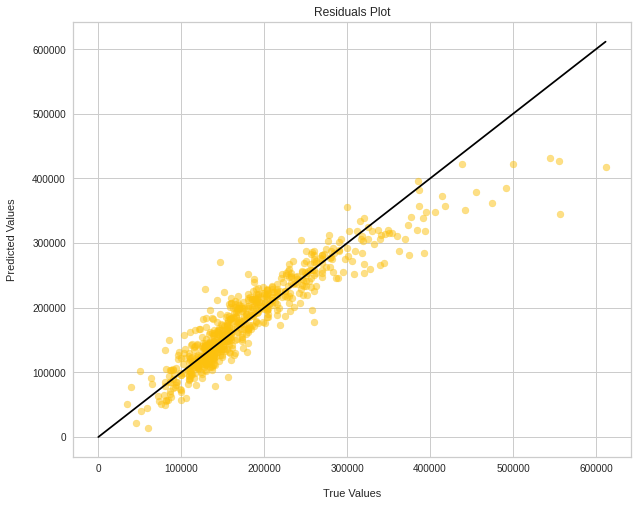

In [ ]:
# Generate figure of predicted vs actual results
fig = plt.figure(figsize=(10, 8))

# Plot True vs Predicted
plt.scatter(y_test, y_pred, alpha = 0.5, c= '#fcc10e')

# Plot line to visualize residuals
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='black')

plt.title('Residuals Plot')
plt.xlabel('True Values', labelpad=15)
plt.ylabel('Predicted Values', labelpad=15);

Looking at our residual plot, we can see that we're underpredicting some of the more expensive homes. We'll assess our predictors and see how me can manipulate our dataset to achieve a lower RMSPE.

First we'll look at the coorelations between our numerical predictors. Maybe we still have some numerical predictors that are highly coorelated, though this would result in overfitting but it doesnt hurt to check.

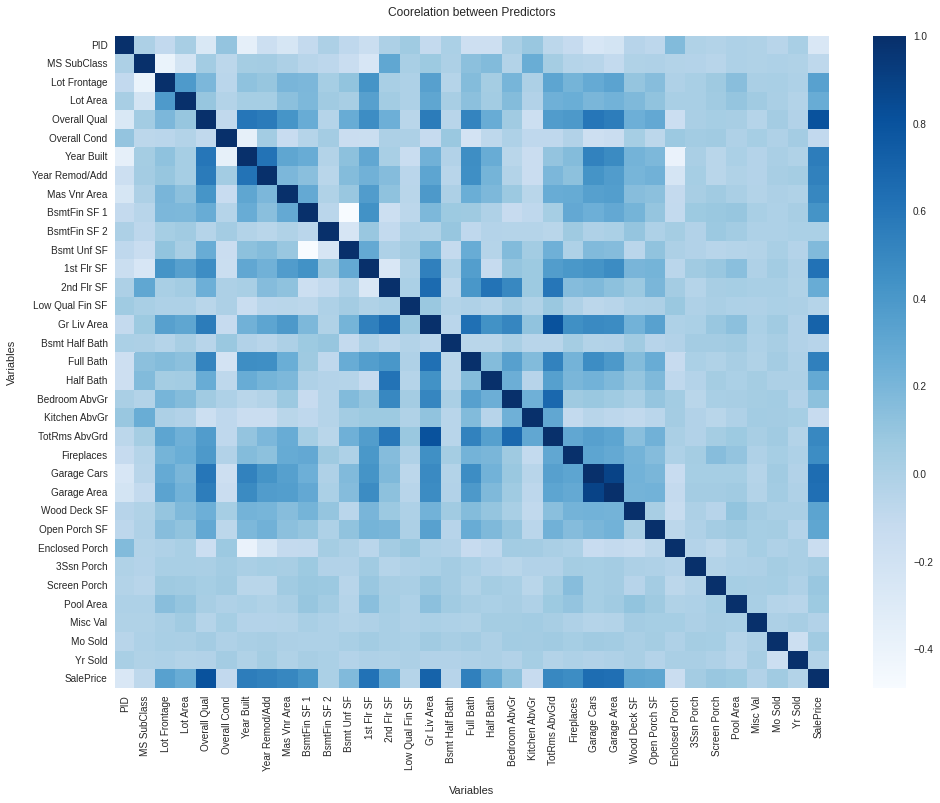

In [ ]:
cols_corr = num_data_imputed.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(cols_corr, cmap="Blues")
plt.title('Coorelation between Predictors', pad= 20)
plt.xlabel('Variables', labelpad=15)
plt.ylabel('Variables', labelpad=15);

While we do have a couple of predictors that are somewhat coorelated, we'll look at each predictors relationship to our response, `SalePrice`. We'll drop columns and datapoints that may be affecting our model negatively by cross-analyzing both.

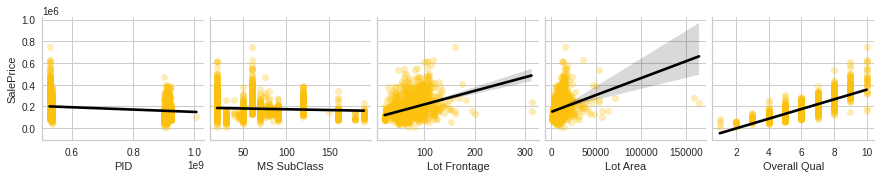

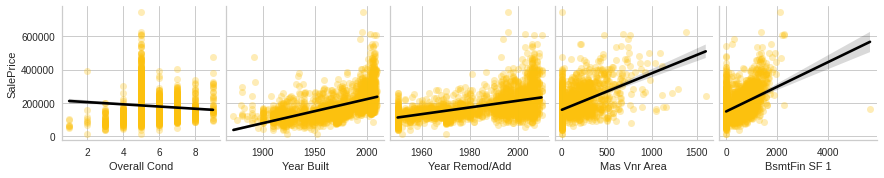

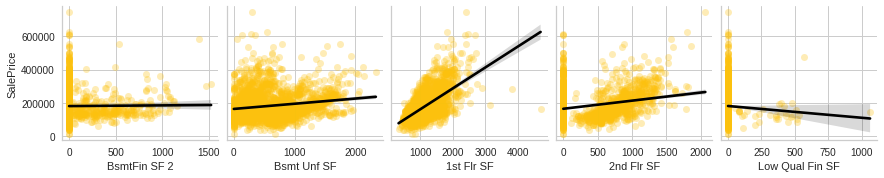

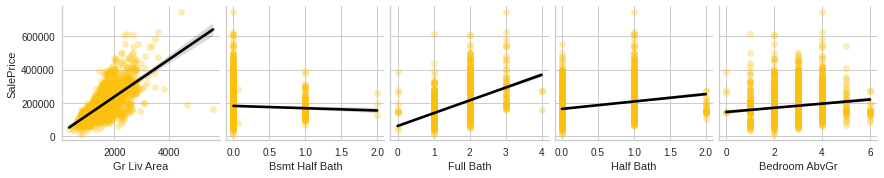

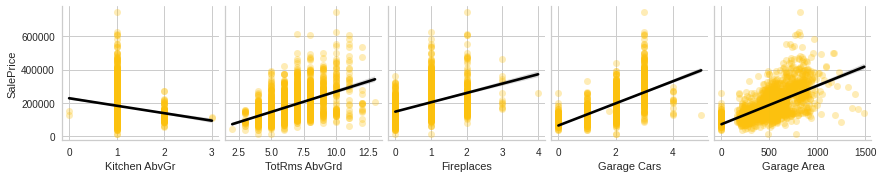

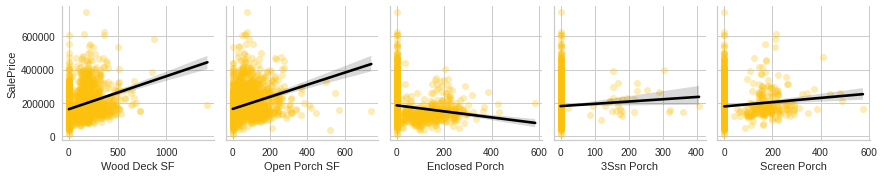

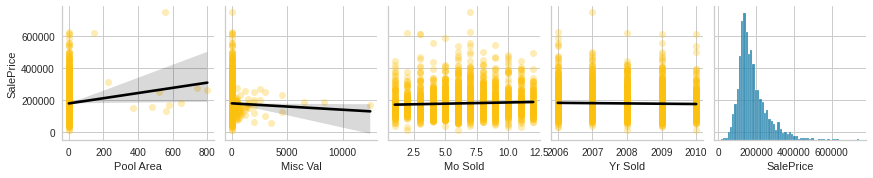

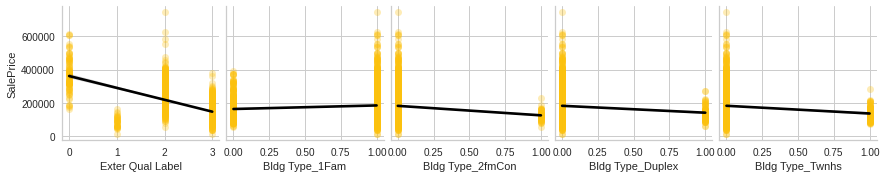

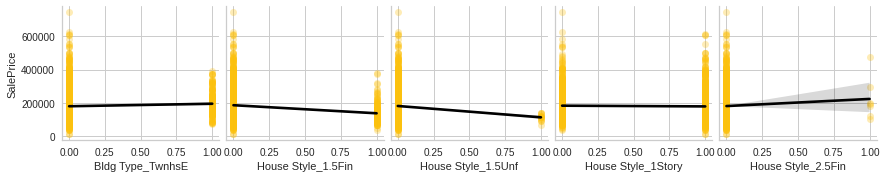

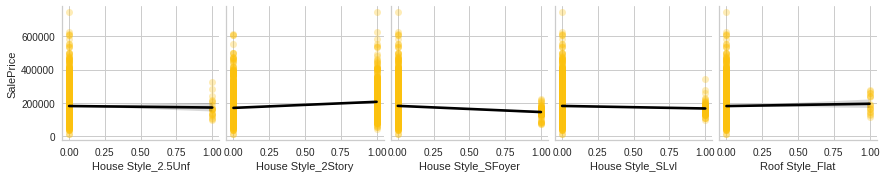

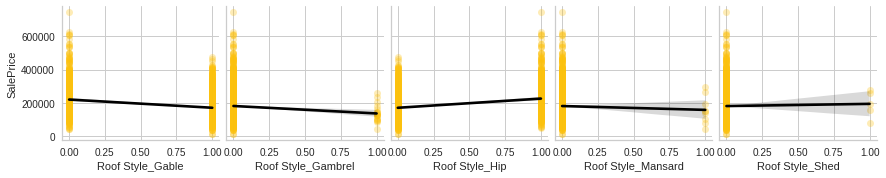

In [ ]:
# 55 columns in current dataframe, we want a 11x5 grid so we'll divide col names by 11
grid = np.array_split(data_comb.columns, 11)

# Graph pairplot of every column in current itteration
for i in range(11):
  sns.pairplot(data=data_comb, kind = 'reg', y_vars=['SalePrice'], x_vars= list(grid[i]), 
               plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'color':'#fcc10e', 'alpha': 0.3}})

## Data Manipulation

From the analysis of both our coorelation heatmap and pairplot, we can drop the following predictors and expect better results.

<table>
<tr><th>Column Drops </th><th>Row Drops</th></tr>
<tr><td>

|Column|Reason|
|--|--|
|TotRms AbvGrd|Strong coorelation to Gr Liv Area
Garage Cars|Non-Linear Relationship
Pool Area|Non-Linear Relationship
House Style_1Story|Non-Linear Relationship
Half Bath|Non-Linear Relationship
Exter Qual|Non-Linear Relationship

</td><td>

|Column|Condition|Reason|
|--|--|--|
|BsmtFin SF 1| > 4000|Outlier
Low Qual Fin SF| > 750|Outlier

</td></tr> </table>

We had a decent percent error in our first model, and if our assumptions are wrong and performing the above mentioned changes result in decreased performance of our model, we'll want to refer back to the data we trained our original model with. Because of this, we'll make a copy of our DataFrame, run the changes, and fit our models with our new DataFrame.

In [ ]:
# Make copy of original dataframe to test assumptions
test = data_comb.copy()

# Drop columns and datapoints specified
test.drop(columns=['TotRms AbvGrd', 'Garage Cars', 'Pool Area', 
                   'House Style_1Story', 'Half Bath', 'Exter Qual Label',
                   'Misc Val'], inplace=True, axis=1)
test.drop(data_comb[data_comb['Lot Area'] > 100000].index, inplace=True)
test.drop(test[test['BsmtFin SF 1'] > 4000].index, inplace= True)
test.drop(test[test['Low Qual Fin SF'] > 750].index, inplace= True)

## Re-Fit Model

Now that we have our new and restructered testing DataFrame, we can fit this into our model and check our assumptions.

In [ ]:
X = test.drop('SalePrice', axis = 1)
y = test['SalePrice']

# Perform CV
n = 500
results = np.zeros(n)
percent = np.zeros(n)

model = LinearRegression()

for idx in range(n):
  #Split data into training and testing subsets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

  #Make, fit, and predict
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  #Add RMSE to results
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

  #Add percent error to percent
  percent[idx]= (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100

# Save for inputting into Model comparison dataframe
linear_pe = percent.mean().round(2)

print(f"CV RMSE: {results.mean().round(2)}")
print(f"Percent Error: {linear_pe}")
print(f"Number of Predictors: {len(X.columns)}")



CV RMSE: 29318.22
Percent Error: 18.84
Number of Predictors: 47


By dropping those predictors and data points, we were able to slightly improve our model. We'll save our RMSPE to a DataFrame for reference in later comparison of models.

In [ ]:
model_compare = pd.DataFrame({'':['PE']}).set_index('')

#Add Linear Regression model PE from above to dataframe
model_compare['Linear'] = linear_pe
model_compare

,Linear
,
PE,18.84


Now we'll see how our model does with ridge and lasso regression.

## Ridge Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Train the model
my_fit_rr = Ridge(alpha = 1, normalize = True) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# Calculate RMSE
y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 32496.363182719524


Now we'll look at other $\alpha$ values and see which one produces the smallest RMSE. We'll then use that $\alpha$ in our model. As to no be repetitve, the same process is used for training our Lasso Regression model.

In [ ]:
# Specify values of alpha we want to try 
alph = [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph: 
  # Train the model
  my_fit_rr = Ridge(alpha = i, normalize = True) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(my_fit_rr, X, y, scoring='neg_mean_squared_error', cv = 10)
  rmse = np.sqrt(abs(results.mean()))
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df)

      Alpha          RMSE
0    0.0001  29133.161207
1    0.0010  29131.190004
2    0.0100  29124.570764
3    0.1000  29392.912059
4    1.0000  33585.484122
5    2.0000  37866.796987
6    3.0000  41625.618103
7    4.0000  44855.533312
8    5.0000  47619.181484
9   10.0000  56773.840130
10  20.0000  64926.311972
11  30.0000  68623.717259
12  50.0000  72085.268727


It looks like .01 gives us the smallest RMSE so we'll use this $\alpha$ when training our model.

In [ ]:
# Retrain the model w/ alpha = .01
my_fit_rr = Ridge(alpha = .01, normalize = True) 
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X, y, scoring='neg_mean_squared_error', cv = 10)
rmse = np.sqrt(abs(results.mean()))
print(f"RMSE: {rmse}")

#Calculate Percent Error
n = 500

percent = np.zeros(n)

for idx in range(n):
  #Split data into training and testing subsets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

  #Make, fit, and predict
  my_fit_rr.fit(X_train, y_train)
  y_pred = my_fit_rr.predict(X_test)

  #Add percent error to percent
  percent[idx]= (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100

ridge_pe = percent.mean().round(2)
print(f"Percent Error: {ridge_pe}")

model_compare['Ridge'] = ridge_pe

RMSE: 29124.570764256136
Percent Error: 18.66


## Lasso Regression


As mentioned above, we'll repeat the same process to achieve our optimal $\alpha$ value.

In [ ]:
# Specify values of alpha we want to try 
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph: 
  # Train the model
  my_fit_lasso = Lasso(alpha = i, normalize = True, tol = .1, max_iter=1000000) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)
  
  # Calculate CV RMSE
  results = cross_val_score(my_fit_lasso, X, y, scoring='neg_mean_squared_error', cv = 10)
  rmse = np.sqrt(abs(results.mean()))
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df)

           Alpha          RMSE
0   1.000000e-15  29269.371374
1   1.000000e-10  29269.371374
2   1.000000e-08  29269.371374
3   1.000000e-04  29269.367770
4   1.000000e-03  29269.335336
5   1.000000e-02  29269.011276
6   1.000000e-01  29265.801280
7   1.000000e+00  29237.296159
8   2.000000e+00  29213.432380
9   3.000000e+00  29205.464267
10  4.000000e+00  29241.848165
11  5.000000e+00  29238.097479
12  1.000000e+01  29209.756634
13  2.000000e+01  29359.416041
14  3.000000e+01  29705.658916
15  5.000000e+01  30434.921478


In [ ]:
# Train the model
my_fit_lasso = Lasso(alpha = 1e+1, normalize = True, tol = .01, max_iter=1000000) 
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X, y, scoring='neg_mean_squared_error', cv = 10)
rmse = np.sqrt(abs(results.mean()))
print(f"RMSE: {rmse}")

#Calculate Percent Error
n = 500

percent = np.zeros(n)

for idx in range(n):
  #Split data into training and testing subsets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

  #Make, fit, and predict
  my_fit_lasso.fit(X_train, y_train)
  y_pred = my_fit_lasso.predict(X_test)

  #Add percent error to percent
  percent[idx]= (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100

lasso_pe = percent.mean().round(2)
print(f"Percent Error: {lasso_pe}")

model_compare['Lasso'] = lasso_pe

RMSE: 29173.579148394245
Percent Error: 18.5


## Compare Models

Now that we have the RMSPE of all three of our models, we'll call the DataFrame they're stored in a see how they stack up.

In [ ]:
model_compare

,Linear,Ridge,Lasso
,,,
PE,18.84,18.66,18.5


*After multiple times running the entire notebook without edits, RMSPE for Ridge and Lasso varies between being the minimum.*

### Next Steps
---


* Analyze categorical predictors and keep more that may add value to our model.
* Assess potential outliers before imputing continuous predictors.
* Start with a MVP then manipulate data, as to eventually keep strongest predictors.

